In [ ]:
!git clone https://github.com/razuswe/Prima-Indian-Diabetes-prediction.git

Cloning into 'Prima-Indian-Diabetes-prediction'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (48/48), done.


In [ ]:
cd Prima-Indian-Diabetes-prediction

/content/Prima-Indian-Diabetes-prediction


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [ ]:
data_frame = pd.read_csv("pimadataorig.csv")

In [ ]:

data_frame.shape

(768, 9)

In [ ]:

data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_frame.tail(5)


,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:

print (data_frame.isnull().values.any())

False


In [ ]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

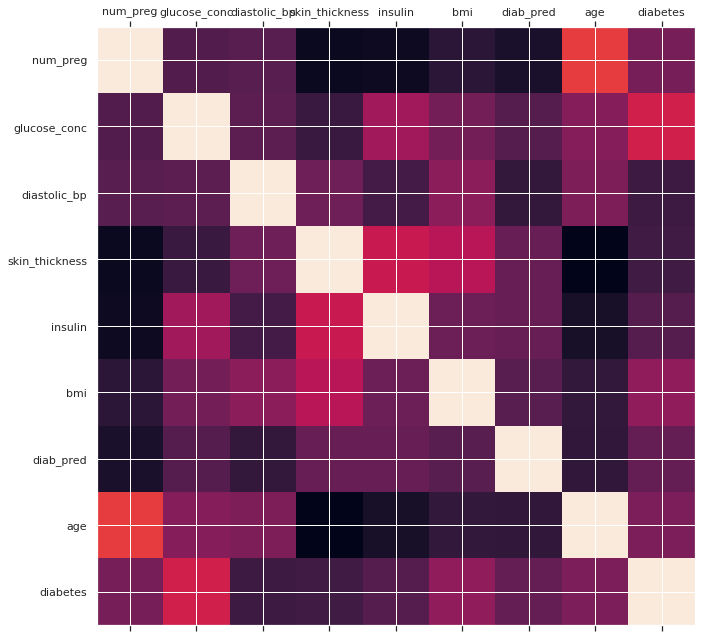

In [ ]:

plot_corr(data_frame)

In [ ]:
data_frame.corr()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
del data_frame['skin_thickness']

In [ ]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


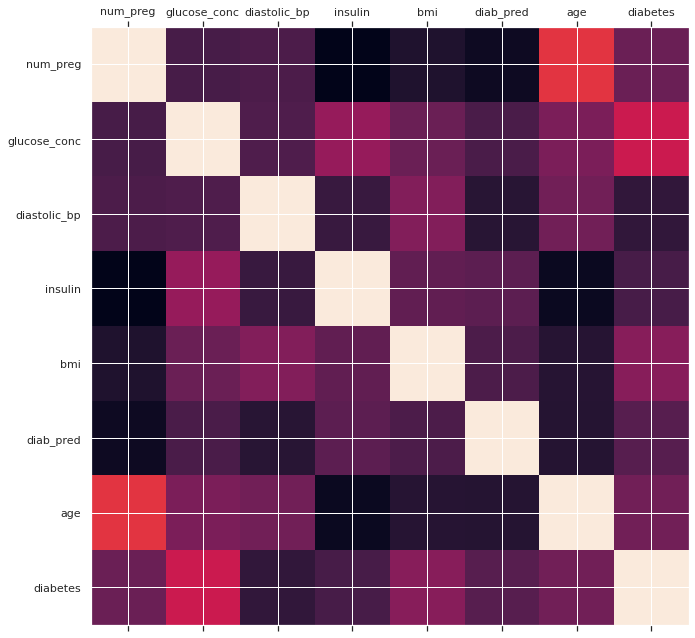

In [ ]:

plot_corr(data_frame)

In [ ]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [ ]:
diabetes_map = {True : 1, False : 0}
data_frame['diabetes'] = data_frame['diabetes'].map(diabetes_map)


In [ ]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [ ]:
data_frame.isnull().values.any()

False

In [26]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['diabetes'] == 1])
num_false = len(data_frame.loc[data_frame['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))


Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [31]:
from sklearn.model_selection import train_test_split 

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything


In [32]:

trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

69.92% in training set
30.08% in test set


In [35]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 1]), (len(data_frame.loc[data_frame['diabetes'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 0]), (len(data_frame.loc[data_frame['diabetes'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [36]:

data_frame.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [38]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))

print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [50]:

from sklearn.impute import SimpleImputer

In [54]:

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [55]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)


In [57]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7598


In [58]:
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is: 0.7489


In [59]:
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 52  28]
 [ 30 121]]


In [60]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.65      0.64        80
           0       0.81      0.80      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231



In [61]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [62]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


In [63]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7662


In [65]:
import matplotlib.pyplot as plot

print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 55  25]
 [ 29 122]]

Classification Report

              precision    recall  f1-score   support

           1       0.65      0.69      0.67        80
           0       0.83      0.81      0.82       151

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.77      0.77       231



In [66]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print ("Confusion Matrix")

print (metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))

print ("")

print ("Classification Report")

print (metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))


Accuracy : 0.7359
Confusion Matrix
[[ 47  33]
 [ 28 123]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print( "Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0])) 
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.7013
[[ 53  27]
 [ 42 109]]

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.66      0.61        80
           0       0.80      0.72      0.76       151

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



In [68]:

from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [69]:

# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [70]:

from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

Accuracy of our SVM model is : 0.7821


In [71]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))

Accuracy: 0.7489


In [72]:
print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Amchine
[[ 47  33]
 [ 25 126]]

Classification Report

              precision    recall  f1-score   support

           1       0.65      0.59      0.62        80
           0       0.79      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



In [73]:
from sklearn.neural_network import MLPClassifier
# Create a RandomForestClassifier object
ann_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

ann_model.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [74]:
prediction_from_trained_data = ann_model.predict(X_train)

In [75]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our ANN model is : {0:.4f}".format(accuracy))

Accuracy of our ANN model is : 0.7542


In [76]:
ann_predict_test = ann_model.predict(X_test)

#get accuracy
ann_accuracy_testdata = metrics.accuracy_score(y_test, ann_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(ann_accuracy_testdata))

Accuracy: 0.7100


In [77]:
print ("Confusion Matrix for Artificial Neural Network")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, ann_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, ann_predict_test, labels=[ 1,0])))

Confusion Matrix for Artificial Neural Network
[[ 37  43]
 [ 24 127]]

Classification Report

              precision    recall  f1-score   support

           1       0.61      0.46      0.52        80
           0       0.75      0.84      0.79       151

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.70      0.71      0.70       231



In [78]:
from sklearn.tree import DecisionTreeClassifier

# create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [79]:
prediction_from_trained_data = dt_model.predict(X_train)

In [80]:

from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy))

Accuracy of our DT model is : 1.0000


In [81]:
dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

Accuracy: 0.7056


In [82]:
print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

Confusion Matrix for DT
[[ 53  27]
 [ 41 110]]

Classification Report

              precision    recall  f1-score   support

           1       0.56      0.66      0.61        80
           0       0.80      0.73      0.76       151

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



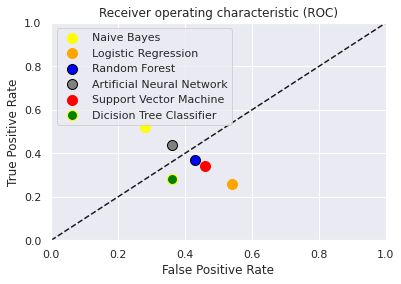

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# fpr, tpr
naive_bayes = np.array([0.28, 0.52])
logistic = np.array([0.54, 0.26])
random_forest = np.array([0.43, 0.37])
ann = np.array([0.36, 0.44])
svm = np.array([0.46, 0.34])
dt = np.array([0.52, 0.28])

#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='gray', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(ann[0], dt[1], label = 'Dicision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper left')

plt.show()
